<center><img src="http://milestonetechs.com/media/filer_public_thumbnails/filer_public/24/26/24260fc4-2637-4348-b2bd-3c333f2f806d/python_logo.jpg__800x250_q85_crop_subsampling-2.jpg" width="1000"></center>

# Programa de Especialización en Python

## Tema 6. Limpieza de datos

### Prof. Manuel Sigüeñas, M.Sc.(c)

<a id='beginning'></a>

En esta sección veremos una breve introducción a las principales tareas de preprocesamiento de datos y el tratamiento de valores faltantes:

1. [¿Por qué preparar los datos?](#part1) 
2. [Principales tareas en la preparación de datos](#part2)
3. [Datos faltantes](#part3)
3. [Manejo de datos faltantes](#part4) 

In [1]:
from IPython.display import Image
%matplotlib inline

[Ir a Inicio](#beginning)

-----

<a id='part1'></a>
## ¿Por qué preparar los datos?

- Algún tipo de preparación de datos siempre es necesario para la mayoría de técnicas cuantitativas.
- El propósito de la preparación es transformar los conjuntos de datos de tal forma que la información que contienen este mejor expuesta para la técnica que se utilizará.
- Los errores de predicción deberían ser menores (o en el peor caso similares) luego de la preparación de datos, en comparación con la data inicial.
- La preparación de datos también prepara al analista para producir mejores modelos y de manera mas rápida.
- Tener buenos datos es un prerrequisito para producir modelos efectivos de cualquier tipo.
- Los datos necesitan ser formateados para cada software en particular.
- Los datos necesitan ser adecuados para un método en particular.
- Los datos en la vida real estan ‘sucios‘.
- Incompletos: Falta de valores en los atributos, carecen de algunos atributos de interés, sólo contienen datos agregados.
ej., ocupación = “
- Anómalos: errores y outliers.
ej., Salario = "-10"
- Inconsistentes: contienen discrepancias en códigos y nombres.
ej., Edad = ‘42‘, Cumplea˜ nos = "03/07/1997"

### ¿De dónde provienen los datos incompletos?

- Datos "NO" aplicables al momento de ser colectados.
- Diferentes consideraciones de tiempo cuando fueron recolectados y cuando son analizados.
- Problemas Humanos/hardware/software.

### ¿De dónde provienen los datos anómalos (valores incorrectos)?

- Instrumentos de recolección de datos defectuoso.
- Errores humanos o de computadora en la entrada de los datos.
- Errores en la transmisión de datos.

### ¿De dónde provienen los datos inconsistentes?

- Diferentes fuentes de datos.
- Violación de dependencias funcionales (ej., modificacion en algunos datos relacionados).
- Registros duplicados también necesitan ser limpiados.

[Ir a Inicio](#beginning)

-----

<a id='part2'></a>
## Principales tareas en la preparación de datos

- ¡No hay calidad en los datos, no hay calidad en los resultados!
- Decisiones de calidad deben de basarse en datos de calidad. Ejemplo: datos duplicados o perdidos pueden producir estad´ısticas enganosas o incorrectas.
- Data warehouse (colección de datos orientada a un determinado ámbito) necesita una integración consistente de datos de calidad.
- La selección de datos, la limpieza y la transformación comprende la mayor parte del trabajo de construir una data warehouse.

### tareas

**Limpieza de datos:** 

completa valores faltantes, suavizar datos ruidosos, identificar o remover outliers y resolver inconsistencias.

**Integración de datos:** 

integración de múltiples bases de datos, cubos de datos, archivos.

**Transformación de datos:** 

normalización y agregación (totalización).

**Reducción de datos:** 

se obtiene una representación mas reducida en volúmen pero que produce los mismos o similares resultados analíticos.

**Discretización de datos:** 

parte de la reducción de datos pero con particular importancia, especialmente para datos numéricos.

[Ir a Inicio](#beginning)

-----

<a id='part3'></a>
## Datos faltantes

Los datos no siempre están disponibles.

La falta de valores se puede deber a:
- Mal funcionamiento de equipos.
- Inconsistencia con otros datos registrados y por lo tanto eliminados.
- Datos no ingresados debido a equivocaciones.
- Algunos datos pudieron no considerarse importantes al momento de ingresar datos.
- No se registró historial o cambios en los datos.

Puede ser necesario estimar estos valores faltantes.

Los valores faltantes son un problema común en an´ alisis estad´ıstico.

Se ha propuesto muchos m´ etodos para el tratamiento de valores faltantes. Muchos de estos m´ etodos fueron desarrollados para el tratamiento de valores faltantes en encuestas por muestreo.

### ¿Y el impacto?

Impacto de los valores faltantes:

1% datos faltantes - trivial.

1-5% - manejable.

5-15% - requiere m´ etodos sofisticados.

Mas del 15% - interpretación perjudicial.

[Ir a Inicio](#beginning)

-----

<a id='part4'></a>
## Manejo de datos faltantes

### Identificación de valores faltantes en datos tabulares

In [4]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
df.isnull().sum()

A    0
B    0
C    0
D    1
dtype: int64

In [5]:
# acceder a la matriz con NumPy
# a través del atributo "values"
df.values


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Tratamiento

**Eliminar:** 

Es la opción más sencilla y consiste en eliminar las observaciones o variables que tengan los datos perdidos. Solamente debe
realizarse si es poco el porcentaje de observaciones a eliminar.

**Reemplazar (imputar):** 

Reemplazar el valor perdido con un valor conocido. Variedad de métodos, desde opciones sencillas (reemplazar
por la media o mediana) hasta otras mas complejas (modelos de regresión).

**Mantener:** 

No realizar imputación. A veces es factible analizar la información por separado. Por ejemplo, en algunas situaciones los procedimientos de Máxima Verosimilitud que usan variantes del algoritmo EM (Expectation-Maximization) pueden manejar la estimación de parámetros en presencia de valores faltantes.

### Eliminando muestras o características con valores faltantes

In [7]:
# eliminar filas que contienen valores faltantes
# axis = 0 – si quieres eliminar las filas
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# eliminar columnas que contienen valores faltantes
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# (how = "all") solo elimina filas donde todas las columnas son NaN
df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# (thresh=4) elimine filas que tienen menos de 3 valores reales
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [15]:
# (subset=['C']) solo elimine filas donde NaN aparezca en columnas específicas (aquí: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputando valores perdidos

**Imputación:** Los valores faltantes son reemplazados con valores estimados basados en la información disponible.
- Imputación por la media
- Imputación por la mediana
- Imputación por la moda

In [16]:
# nuestra matriz original
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Comprender la API del estimador scikit-learn

In [17]:
Image(filename='D:/Python/1. Nivel I/6/imagenes/06_01.png', width=400) 

NameError: name 'Image' is not defined

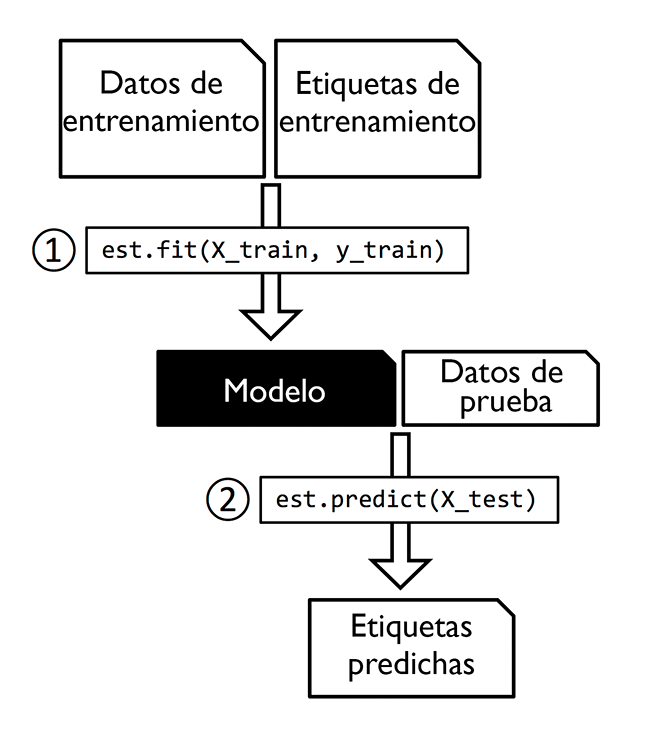

In [17]:
Image(filename='D:/Python/1. Nivel I/6/imagenes/06_02.png', width=300) 

#### Imputación univariada

SimpleImputer proporciona estrategias básicas para imputar valores perdidos. Los valores perdidos pueden ser imputados con un valor constante proporcionado, o utilizando las estadísticas (mean, median o most_frequent) de cada columna en la que se encuentran los valores perdidos. SimpleImputer también permite diferentes codificaciones de valores faltantes.

El siguiente fragmento muestra cómo reemplazar los valores faltantes, codificados como NaN, utilizando el valor medio de las columnas que contienen los valores faltantes:

In [30]:
# imputar valores perdidos a través de la media de la columna

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

/home/ronald/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

### Data Census

In [22]:
FileCSV="/home/ronald/Sistemas/app-python-ml/app/sesión_3/datos/censusn.csv"
censusn=pd.read_csv(FileCSV,  sep=';')
censusn.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,39,6.0,77516,13,3,9.0,4,1,1,2174,0,40,1.0,1
1,2,50,2.0,83311,13,1,5.0,3,1,1,0,0,13,1.0,1
2,3,38,1.0,215646,9,2,7.0,4,1,1,0,0,40,1.0,1
3,4,53,1.0,234721,7,1,7.0,3,5,1,0,0,40,1.0,1
4,5,28,1.0,338409,13,1,6.0,1,5,0,0,0,40,13.0,1


In [25]:
censusn.dtypes
#float 
# integer = entero

Unnamed: 0      int64
V1              int64
V2            float64
V3              int64
V4              int64
V5              int64
V6            float64
V7              int64
V8              int64
V9              int64
V10             int64
V11             int64
V12             int64
V13           float64
V14             int64
dtype: object

In [26]:
#porcentaje de columnas con valores perdidos
(censusn.isnull().sum() / len(censusn))*100

Unnamed: 0    0.000000
V1            0.000000
V2            5.638647
V3            0.000000
V4            0.000000
V5            0.000000
V6            5.660146
V7            0.000000
V8            0.000000
V9            0.000000
V10           0.000000
V11           0.000000
V12           0.000000
V13           1.790486
V14           0.000000
dtype: float64

In [31]:
imp_moda = Imputer(strategy="most_frequent")

/home/ronald/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
censusn_clean= imp_moda.fit_transform(censusn) # agregar si desea imputar sólo la variable V2 [["V2"]]
censusn_clean=pd.DataFrame(censusn_clean)
censusn_clean.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,6.0,77516.0,13.0,3.0,9.0,4.0,1.0,1.0,2174.0,0.0,40.0,1.0,1.0
1,2.0,50.0,2.0,83311.0,13.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,13.0,1.0,1.0
2,3.0,38.0,1.0,215646.0,9.0,2.0,7.0,4.0,1.0,1.0,0.0,0.0,40.0,1.0,1.0
3,4.0,53.0,1.0,234721.0,7.0,1.0,7.0,3.0,5.0,1.0,0.0,0.0,40.0,1.0,1.0
4,5.0,28.0,1.0,338409.0,13.0,1.0,6.0,1.0,5.0,0.0,0.0,0.0,40.0,13.0,1.0


In [93]:
(censusn_clean.isnull().sum() / len(censusn_clean))*100

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
dtype: float64

[Ir a Inicio](#beginning)

-----